## Load a sample of crime data
Datasets used in this class are from Seattle or San Francisco. Here I am first loading a small sample of the data to better understand how it is structured, and what patterns might be present

[data source](https://github.com/djq/datasci_course_materials/blob/master/assignment6/crimeanalytics.md)



In [29]:
# first set my working directory
data = '/Users/djq/repos/jupyter-notebooks/communicating-data-science/week1/data'
setwd(data)

# load sample of data
seattle <- read.csv('seattle_incidents_summer_2014.csv')

# what fields are in dataset?
head(seattle)

,RMS.CDW.ID,General.Offense.Number,Offense.Code,Offense.Code.Extension,Offense.Type,Summary.Offense.Code,Summarized.Offense.Description,Date.Reported,Occurred.Date.or.Date.Range.Start,Occurred.Date.Range.End,Hundred.Block.Location,District.Sector,Zone.Beat,Census.Tract.2000,Longitude,Latitude,Location,Month,Year
1,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.301,-122.3647,47.68252,"(47.68252427, -122.364671996)",6,2014
2,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1,-122.2771,47.6399,"(47.639900761, -122.277080248)",6,2014
3,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,,81XX BLOCK OF 11 AV SW,F,F3,11300.5,-122.3493,47.52923,"(47.529232299, -122.349312181)",8,2014
4,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,,6XX BLOCK OF PINE ST,M,M2,8200.1,-122.3348,47.61237,"(47.612368448, -122.334817763)",6,2014
5,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.202,-122.3294,47.68596,"(47.685959879, -122.329378505)",6,2014
6,480485,2015904103,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,06/19/2015 02:55:00 PM,06/19/2014 02:45:00 PM,07/10/2014 02:45:00 PM,35XX BLOCK OF S FERDINAND ST,R,R3,10300.4,-122.2875,47.55785,"(47.557854802, -122.287477902)",6,2014


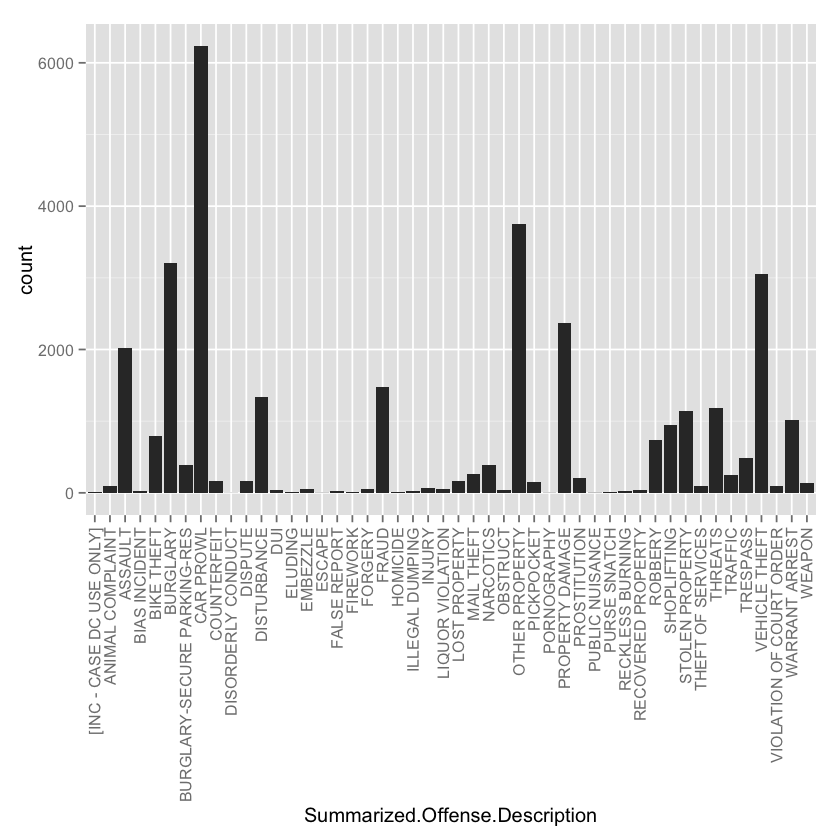

In [6]:
# lets explore how frequently these occur in our sample by examining them visually
library(ggplot2)

# show a histogram of sample data
c <- ggplot(seattle, aes(x = Summarized.Offense.Description)) 
c <- c + geom_histogram() + theme(axis.text.x  = element_text(angle=90, hjust=1, vjust=0.5))

# show plot
c

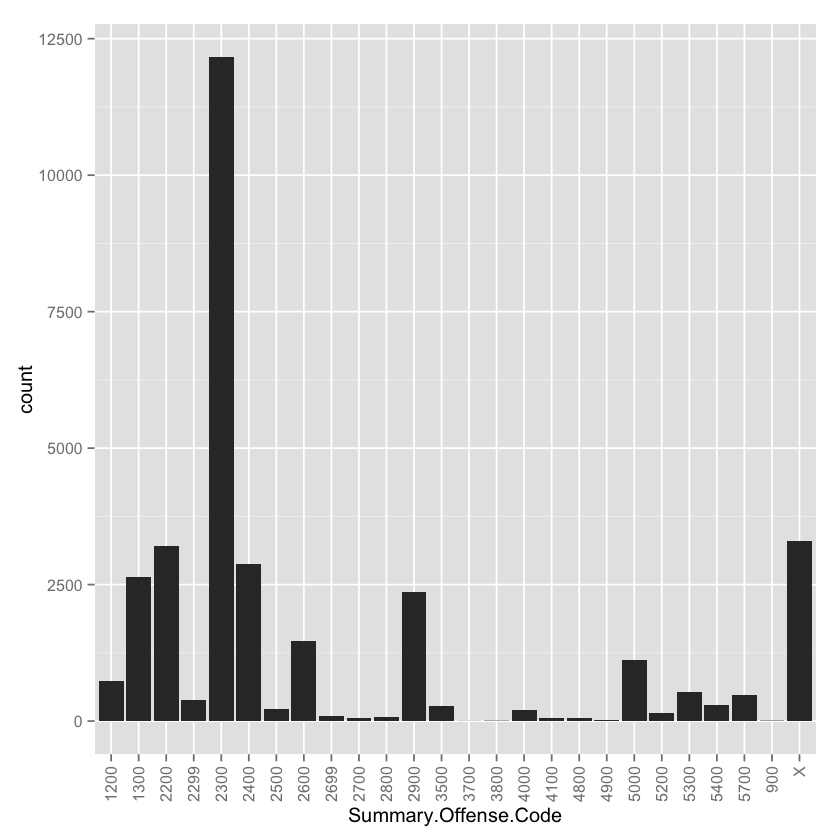

In [9]:
# as the overall crime cateorization is quite specific, let's use the Summary.Offense.Code which is more specific
c <- ggplot(seattle, aes(x = Summary.Offense.Code)) 
c <- c + geom_histogram() + theme(axis.text.x  = element_text(angle=90, hjust=1, vjust=0.5))

# show plot
c

In [42]:
# let's explore what these specific crime codes are
codes <- data.frame(code = seattle$Summary.Offense.Code, description = seattle$Summarized.Offense.Description)

# reduce this to unique values
codes <- unique(codes)
codes

,code,description
1,2200,BURGLARY
2,2600,FRAUD
3,2300,MAIL THEFT
4,2500,COUNTERFEIT
5,2300,OTHER PROPERTY
11,2700,EMBEZZLE
17,2300,CAR PROWL
20,5300,THREATS
25,2900,PROPERTY DAMAGE
31,X,LOST PROPERTY


In [56]:
# focusing just on crime reports that correctly use the theft code
# 2900 - property damage
theft_codes <- c('2200', '2299', '2300', '2400', '2500', '2600', '2699', '2700', '2800')
subset(codes, code %in% theft_codes)

,code,description
1,2200,BURGLARY
2,2600,FRAUD
3,2300,MAIL THEFT
4,2500,COUNTERFEIT
5,2300,OTHER PROPERTY
11,2700,EMBEZZLE
17,2300,CAR PROWL
36,2500,FORGERY
41,2400,VEHICLE THEFT
51,2299,BURGLARY-SECURE PARKING-RES


In [57]:
# now subset Seattle data to these criteria
seattle_theft <- subset(seattle, Summary.Offense.Code %in% theft_codes)

# display summary
head(seattle_theft)

,RMS.CDW.ID,General.Offense.Number,Offense.Code,Offense.Code.Extension,Offense.Type,Summary.Offense.Code,Summarized.Offense.Description,Date.Reported,Occurred.Date.or.Date.Range.Start,Occurred.Date.Range.End,Hundred.Block.Location,District.Sector,Zone.Beat,Census.Tract.2000,Longitude,Latitude,Location,Month,Year
1,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.301,-122.3647,47.68252,"(47.68252427, -122.364671996)",6,2014
2,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1,-122.2771,47.6399,"(47.639900761, -122.277080248)",6,2014
3,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,,81XX BLOCK OF 11 AV SW,F,F3,11300.5,-122.3493,47.52923,"(47.529232299, -122.349312181)",8,2014
4,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,,6XX BLOCK OF PINE ST,M,M2,8200.1,-122.3348,47.61237,"(47.612368448, -122.334817763)",6,2014
5,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.202,-122.3294,47.68596,"(47.685959879, -122.329378505)",6,2014
6,480485,2015904103,2308,0,THEFT-BUILDING,2300,OTHER PROPERTY,06/19/2015 02:55:00 PM,06/19/2014 02:45:00 PM,07/10/2014 02:45:00 PM,35XX BLOCK OF S FERDINAND ST,R,R3,10300.4,-122.2875,47.55785,"(47.557854802, -122.287477902)",6,2014


ERROR: Error in eval(expr, envir, enclos): could not find function "facet_plot"


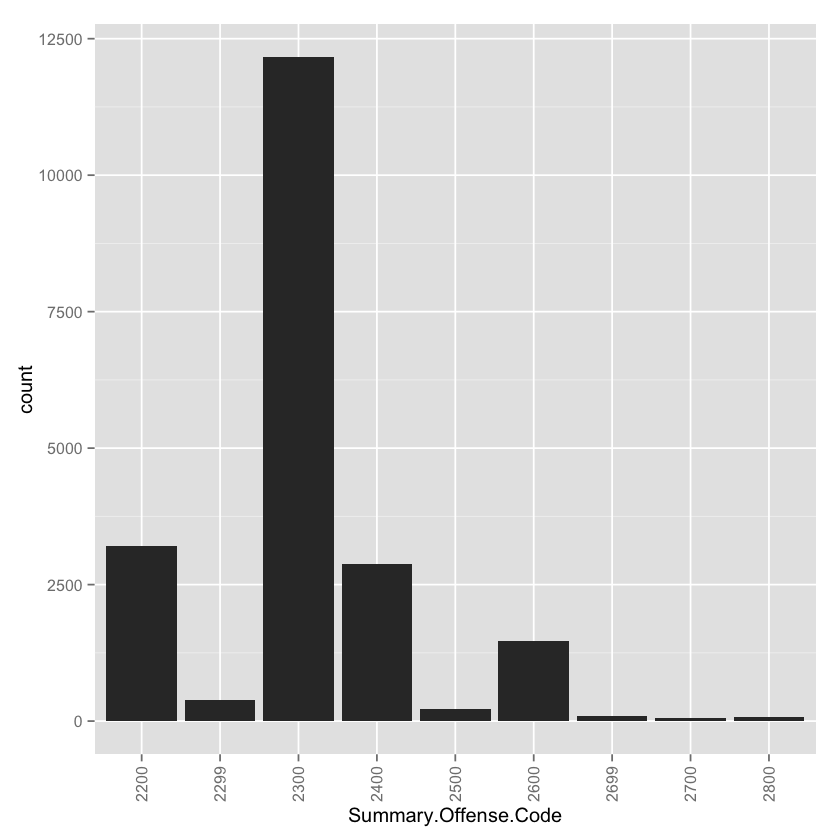

In [62]:
# now replot using only thefts
c <- ggplot(seattle_theft, aes(x = Summary.Offense.Code)) 
c + geom_histogram() + theme(axis.text.x  = element_text(angle=90, hjust=1, vjust=0.5))


# exploring how these patterns vary by census block (District.Sector)
c + facet_plot(~ District.Sector)

# show plot

